# MULTIPLE LINEAR REGRESSION

* **General Formula:** $y = b_0 + b_1 * x_1 + ... + b_n * x_n $  
* Random Note on R:  Column Names with spaces - you can replace spaces with dots.  Instead of ``.

**Assumptions of Linear Regression**  
* Linearity
* Homoscedasticity
* Multivariate Normality
* Independence of Errors
* Lack of Multicollinearity

**Dummy Variables**  
These are used for modeling categorical variables.  

**Dummy Variable Trap**  
* If you create dummy variables for your categorical variable with n levels - you want to create (n-1) dummy variables.
* Otherwise - you will introduce multicollinearity.  
* Multicollinearity: when you are able to calculate one independent variable from other independent variables.
* D1 = 1- D2 : Example for 2 levels.
* Only occurs when you include the constant variable ?

**Statistical Significance**  
* Null Hypothesis: $H_0: $This is a fair Coin. 
* Alternative Hypothesis: $H_1: $ This is not a fair coin.
* P-Value: Probability of observation occuring - given the null hypothesis is true.

**5 Methods of Building a Model**  
1. All-in  
2. Backwards Elimination  
3. Forward Selection  
4. Bidirectional Elimination  
5. Score Comparison  
NOTE: Steps 2,3,4 often referred to as stepwise regression.

**All-in**  
* Using all the independent variables.
* Might use if you have prior knowledge - or are required to.  
* Used in preparation of backward elimination.

**Backward Elimination**  
1. Select Significance Level (EX: 5%)  
2. Fit the full model (All-In)  
3. Consider predictor with highest P-Value.  If P-Value > SL - go to Step 4 ; Othewise - Finished.  
4. Remove the predictor  
5. Fit model without this variable  
6. Go To Step 3

**Forward Selection**  
1. Select Significance Level.  
2. Fit all possible simple regression models.  Select model with lowest P-Value.  
3. Keep this variable and fit all possible 2 variable models added to 1-variable model above.  
4. Consider predictor with LOWEST P-Value.  If P < Significance Level GOTO Step 3.  Otherwise - FINISHED.  

**Bidirectional Elimination**  
1. Select Signifcance Level to Enter - and Significance Level to Stay.  
2. Perform next step from FW Selection.  Need SL Enter to add.    
3. Perform next step from BW Selection.  Need SL Stay to stay.  Back to step 2.  
Repeat until no variables added or removed.

# Begin Multiple Linear Regression  
**Data Preprocessing  
Note: Factors set to 1,2,3 are labels only.  Nominal - not ordinal.

In [5]:
# Data Preprocessing Template

# Importing the dataset
data.startup = read.csv('50_Startups.csv')

#Encode Categorical Data
data.startup$State <- factor(data.startup$State,
                             levels = c('New York', 'California', 'Florida'),
                             labels = c(1,2,3))


# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(data.startup$Profit, SplitRatio = 0.8)
data.train = subset(data.startup, split == TRUE)
data.test = subset(data.startup, split == FALSE)

# Feature Scaling
# training_set = scale(training_set)
# test_set = scale(test_set)

**Fitting Multiple Linear Regression to Training Set**

In [9]:
regressor <- lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend + State,
               data = data.train)

summary(regressor)


Call:
lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend + 
    State, data = data.train)

Residuals:
   Min     1Q Median     3Q    Max 
-33128  -4865      5   6098  18065 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.965e+04  7.637e+03   6.501 1.94e-07 ***
R.D.Spend        7.986e-01  5.604e-02  14.251 6.70e-16 ***
Administration  -2.942e-02  5.828e-02  -0.505    0.617    
Marketing.Spend  3.268e-02  2.127e-02   1.537    0.134    
State2           1.213e+02  3.751e+03   0.032    0.974    
State3           2.376e+02  4.127e+03   0.058    0.954    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9908 on 34 degrees of freedom
Multiple R-squared:  0.9499,	Adjusted R-squared:  0.9425 
F-statistic:   129 on 5 and 34 DF,  p-value: < 2.2e-16


Results above suggest that only R&D Spend has a statistically significant impact on Profit.

In [11]:
regressor.simple <- lm(formula = Profit ~ R.D.Spend,
               data = data.train)

summary(regressor.simple)


Call:
lm(formula = Profit ~ R.D.Spend, data = data.train)

Residuals:
   Min     1Q Median     3Q    Max 
-34334  -4894   -340   6752  17147 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.902e+04  2.748e+03   17.84   <2e-16 ***
R.D.Spend   8.563e-01  3.357e-02   25.51   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9836 on 38 degrees of freedom
Multiple R-squared:  0.9448,	Adjusted R-squared:  0.9434 
F-statistic: 650.8 on 1 and 38 DF,  p-value: < 2.2e-16


**Predict Test Results**  
* Added geom_abline.  Using intercept = 0 and slope = 1 creates a line for x = y.  
* Any point above the line represents x < y which means prediction < actual.

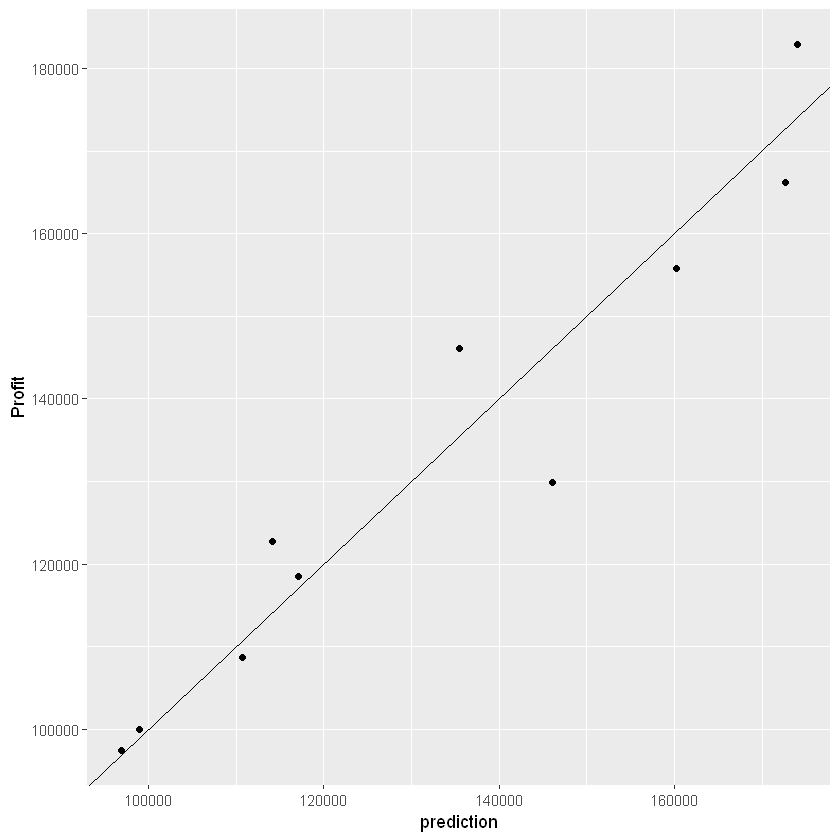

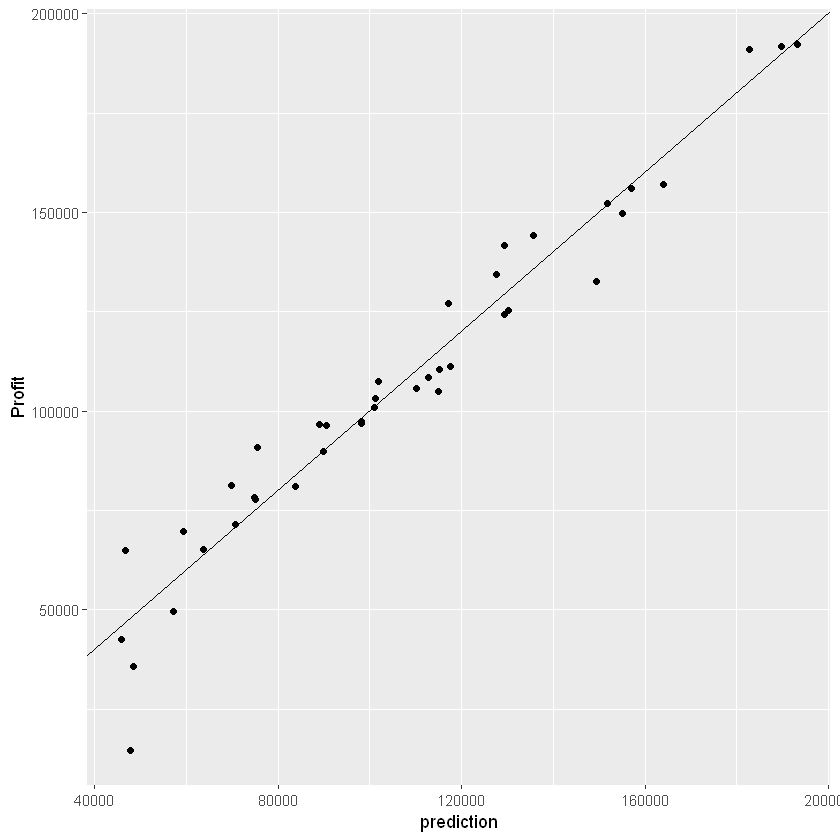

In [20]:
library(ggplot2)
data.test$prediction <- predict(regressor,newdata = data.test)
data.train$prediction <- predict(regressor, newdata = data.train)

ggplot(data.test, aes(x = prediction, y = Profit)) + geom_point() + geom_abline(intercept = 0, slope = 1)
ggplot(data.train, aes(x = prediction, y = Profit)) + geom_point() + geom_abline(intercept = 0, slope = 1)


**Building a Model Using Backward Elimination**
* First step is to look at complete model.  
* Using complete dataset - just for an example - since this is such a small dataset.

In [22]:
regressor <- lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend + State,
               data = data.startup)

summary(regressor)


Call:
lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend + 
    State, data = data.startup)

Residuals:
   Min     1Q Median     3Q    Max 
-33504  -4736     90   6672  17338 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.008e+04  6.953e+03   7.204 5.76e-09 ***
R.D.Spend        8.060e-01  4.641e-02  17.369  < 2e-16 ***
Administration  -2.700e-02  5.223e-02  -0.517    0.608    
Marketing.Spend  2.698e-02  1.714e-02   1.574    0.123    
State2           4.189e+01  3.256e+03   0.013    0.990    
State3           2.407e+02  3.339e+03   0.072    0.943    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9439 on 44 degrees of freedom
Multiple R-squared:  0.9508,	Adjusted R-squared:  0.9452 
F-statistic: 169.9 on 5 and 44 DF,  p-value: < 2.2e-16


Next - remove predictor with highest P-Value that is above our Significance Level (5%).  
For us - states 2 and 3 are both very low - so we will remove the variable State.

In [26]:
regressor <- lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend,
               data = data.startup)

summary(regressor)


Call:
lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend, 
    data = data.startup)

Residuals:
   Min     1Q Median     3Q    Max 
-33534  -4795     63   6606  17275 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.012e+04  6.572e+03   7.626 1.06e-09 ***
R.D.Spend        8.057e-01  4.515e-02  17.846  < 2e-16 ***
Administration  -2.682e-02  5.103e-02  -0.526    0.602    
Marketing.Spend  2.723e-02  1.645e-02   1.655    0.105    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9232 on 46 degrees of freedom
Multiple R-squared:  0.9507,	Adjusted R-squared:  0.9475 
F-statistic:   296 on 3 and 46 DF,  p-value: < 2.2e-16


Highest is Administration.  Remove:

In [27]:
regressor <- lm(formula = Profit ~ R.D.Spend + Marketing.Spend,
               data = data.startup)

summary(regressor)


Call:
lm(formula = Profit ~ R.D.Spend + Marketing.Spend, data = data.startup)

Residuals:
   Min     1Q Median     3Q    Max 
-33645  -4632   -414   6484  17097 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.698e+04  2.690e+03  17.464   <2e-16 ***
R.D.Spend       7.966e-01  4.135e-02  19.266   <2e-16 ***
Marketing.Spend 2.991e-02  1.552e-02   1.927     0.06 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9161 on 47 degrees of freedom
Multiple R-squared:  0.9505,	Adjusted R-squared:  0.9483 
F-statistic: 450.8 on 2 and 47 DF,  p-value: < 2.2e-16


In [28]:
regressor <- lm(formula = Profit ~ R.D.Spend,
               data = data.startup)

summary(regressor)


Call:
lm(formula = Profit ~ R.D.Spend, data = data.startup)

Residuals:
   Min     1Q Median     3Q    Max 
-34351  -4626   -375   6249  17188 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.903e+04  2.538e+03   19.32   <2e-16 ***
R.D.Spend   8.543e-01  2.931e-02   29.15   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9416 on 48 degrees of freedom
Multiple R-squared:  0.9465,	Adjusted R-squared:  0.9454 
F-statistic: 849.8 on 1 and 48 DF,  p-value: < 2.2e-16


# AUTOMATED BACKWARD ELIMINATION

In [29]:
backwardElimination <- function(x,sl) {
    
    numVars = length(x)
    
    for (i in c(1:numVars)) {
        
        regressor = lm(formula = Profit ~ ., data = x)
        maxVar = max(coef(summary(regressor))[c(2:numVars), "Pr(>|t|)"])
        if(maxVar > sl) {
            j = which(coef(summary(regressor))[c(2:numVars), "Pr(>|t|)"] == maxVar)
            x = x[, -j]
        }
        
        numVars = numVars - 1
        
        }
        
        return(summary(regressor))
    }
    
     SL = .05
    dataset = dataset[,c(1,2,3,4,5)]
    backwardElimination(training_set,SL)



Call:
lm(formula = Profit ~ ., data = x)

Residuals:
   Min     1Q Median     3Q    Max 
-34334  -4894   -340   6752  17147 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.902e+04  2.748e+03   17.84   <2e-16 ***
R.D.Spend   8.563e-01  3.357e-02   25.51   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9836 on 38 degrees of freedom
Multiple R-squared:  0.9448,	Adjusted R-squared:  0.9434 
F-statistic: 650.8 on 1 and 38 DF,  p-value: < 2.2e-16
